### 1.1 Install Dependencies and Setup

In [ ]:
!pip install labelme opencv-python matplotlib albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 113.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 12.8 MB/s eta 0:00:00
  Created wheel for labelme: filename=labelme-5.3.1-py3-none-any.whl size=1472255 sha256=5566014f5674d0305ee8610bb114d245a9ebd2568d25dc9719a4bbf2d3e6fa86
  Stored in directory: /root/.cache/pip/wheels/32/d6/4d/f22a84b8a82543c9db03774820

### 1.2 Collect Images Using OpenCV

In [ ]:
import os
import time
import uuid
import cv2

In [ ]:
!pwd

/content


In [ ]:
!ls

sample_data


In [ ]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [ ]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


[ WARN:0@85.177] global cap_v4l.cpp:982 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@85.177] global obsensor_uvc_stream_channel.cpp:156 getStreamChannelGroup Camera index out of range


error: OpenCV(4.8.1) /io/opencv/modules/imgcodecs/src/loadsave.cpp:787: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'


### 1.3 Annotate Images with LabelMe

In [ ]:
!labelme

/bin/bash: /root/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
[INFO   ] __init__:get_config:70 - Loading config file from: /root/.labelmerc
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/root/miniconda3/envs/tf/lib/python3.9/site-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb, eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, wayland-egl, wayland, wayland-xcomposite-egl, wayland-xcomposite-glx, webgl.



# 2. Review Dataset and Build Image Loading Function

### 2.1 Import TF and Deps

In [ ]:
import tensorflow as tf
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt

### Limit GPU Memory Growth

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


### 2.3 Load Image into TF Data Pipeline

In [ ]:
images = tf.data.Dataset.list_files('data/images/*.jpg', shuffle=False)

InvalidArgumentError: ignored

In [ ]:
images.as_numpy_iterator().next()

b'data/images/01bae89d-7da6-11ee-a93f-fc3497a6e8f6.jpg'

In [ ]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [ ]:
images = images.map(load_image)

In [ ]:
images.as_numpy_iterator().next()

array([[[104, 106, 103],
        [101, 103, 100],
        [100, 102,  99],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[101, 103, 100],
        [100, 102,  99],
        [100, 102,  99],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[100, 102,  97],
        [100, 102,  97],
        [101, 103,  98],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [ ]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

### 2.4 View Ray Images With Matplotlib

In [ ]:
image_generator = images.batch(4).as_numpy_iterator()

In [ ]:
plot_images = image_generator.next()

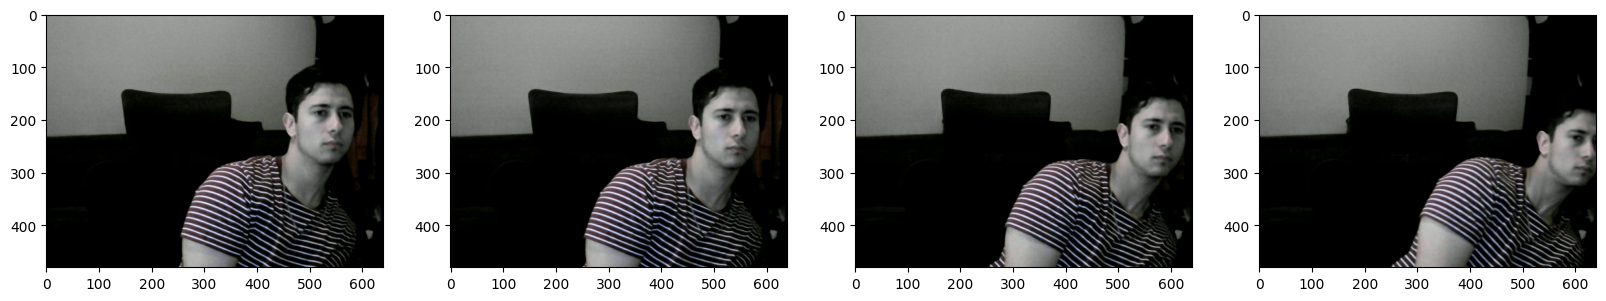

In [ ]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

# 3. Partition Unaugmented Data

### 3.1 Manually split data into train, test and val

In [ ]:
# 180 images, 70% for training
180 * 0.7 # 126 images for training

125.99999999999999

In [ ]:
# 180 images, 30% for test and val
180 * 0.15 # 27 images for each test and val

27.0

### 3.2 Move the Matching Labels

In [ ]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data',folder,'images')):

        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data', folder, 'labels', filename)
            os.replace(existing_filepath, new_filepath)

# 4. Apply Image Augmentation on Images and Labels using Albumentations

### 4.1 Setup Albumentations Transform Pipeline

In [ ]:
import albumentations as alb

In [ ]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                         bbox_params = alb.BboxParams(format = 'albumentations',
                         label_fields=['class_labels']))

### 4.2 Load a Test Image and Annotation with OpenCV and JSON

In [ ]:
img = cv2.imread(os.path.join('data', 'train', 'images', '02117273-7da6-11ee-8717-fc3497a6e8f6.jpg'))

In [ ]:
img

array([[[118, 125, 122],
        [117, 124, 121],
        [116, 121, 119],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[117, 124, 121],
        [117, 124, 121],
        [117, 122, 120],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[113, 120, 117],
        [114, 121, 118],
        [114, 121, 118],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [ ]:
with open(os.path.join('data', 'train', 'labels', '02117273-7da6-11ee-8717-fc3497a6e8f6.json'), 'r') as f:
    label = json.load(f)

In [ ]:
label['shapes'][0]['points']

[[127.29166666666666, 91.04166666666666],
 [361.66666666666663, 394.16666666666663]]

### 4.3 Extract Coordinates and Rescale to Match Image Resolution

In [ ]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [ ]:
coords

[245.0, 96.24999999999997, 447.0833333333333, 398.33333333333337]

In [ ]:
coords = list(np.divide(coords, [640, 480, 640 ,480]))

In [ ]:
coords

[0.3828125, 0.2005208333333333, 0.6985677083333333, 0.8298611111111112]

In [ ]:
img.shape

(480, 640, 3)

### 4.4 Apply Augmentations and View Results

In [ ]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['Fer'])

In [ ]:
type(augmented)

dict

In [ ]:
augmented

{'image': array([[[136, 138, 117],
         [131, 127, 107],
         [121, 116,  94],
         ...,
         [  0,   1,   0],
         [  0,   1,   0],
         [  0,   1,   0]],
 
        [[ 37,  38,  20],
         [ 22,  22,   4],
         [ 15,  13,   0],
         ...,
         [  0,   1,   0],
         [  0,   1,   0],
         [  0,   1,   0]],
 
        [[  0,   2,   0],
         [  1,   2,   0],
         [  1,   2,   0],
         ...,
         [  0,   1,   0],
         [  0,   1,   0],
         [  0,   1,   0]],
 
        ...,
 
        [[ 62,  83,  67],
         [ 66,  87,  71],
         [ 67,  88,  72],
         ...,
         [  0,   1,   0],
         [  0,   1,   0],
         [  0,   1,   0]],
 
        [[ 63,  84,  68],
         [ 67,  87,  73],
         [ 65,  85,  71],
         ...,
         [  0,   1,   0],
         [  0,   1,   0],
         [  0,   1,   0]],
 
        [[ 64,  85,  69],
         [ 68,  88,  74],
         [ 66,  86,  72],
         ...,
         [  0,   1,

In [ ]:
augmented.keys()

dict_keys(['image', 'bboxes', 'class_labels'])

In [ ]:
augmented['image'].shape

(450, 450, 3)

In [ ]:
# x_min and y_min
augmented['bboxes'][0][:2]

(0.10064814814814813, 0.14629629629629637)

In [ ]:
# x_max and y_max
augmented['bboxes'][0][2:]

(0.6214814814814814, 0.8199074074074074)

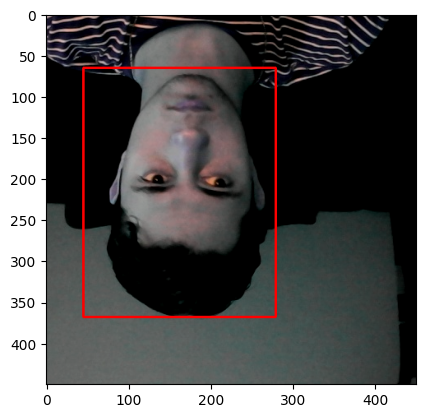

In [ ]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [450, 450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450, 450]).astype(int)),
              (255,0,0),2)

plt.imshow(augmented['image'])

# 5. Build and Run Augmentation Pipeline

### 5.1 Run Augmentation Pipeline

In [ ]:
for partition in ['train', 'test', 'val']:
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001, 0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            if label['shapes']:
                coords[0] = label['shapes'][0]['points'][0][0]
                coords[1] = label['shapes'][0]['points'][0][1]
                coords[2] = label['shapes'][0]['points'][1][0]
                coords[3] = label['shapes'][0]['points'][1][1]
                coords = list(np.divide(coords, [640, 480, 640, 480]))
            else:
                # Handle the case when 'shapes' is an empty list
                # You might want to set default values or handle it differently based on your use case
                print(f"Warning: 'shapes' is an empty list for {image}. Setting default values.")

        try:
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['Fer'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes'])==0:
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)


x_max is less than or equal to x_min for bbox [0.2314453125, 0.1831597222222222, 0.008463541666666647, 0.6193576388888888, 'Fer'].
x_max is less than or equal to x_min for bbox [0.27701822916666663, 0.1636284722222222, 0.027994791666666647, 0.6193576388888888, 'Fer'].
x_max is less than or equal to x_min for bbox [0.19075520833333331, 0.24175347222222207, 0.0, 0.6426627236346515, 'Fer'].
x_max is less than or equal to x_min for bbox [0.30794270833333337, 0.27213541666666663, 0.06217447916666665, 0.7864583333333334, 'Fer'].
x_max is less than or equal to x_min for bbox [0.10611979166666666, 0.28949652777777773, 0.00032552083333331483, 0.6649305555555555, 'Fer'].
image must be numpy array type
x_max is less than or equal to x_min for bbox [0.19401041666666666, 0.38281249999999994, 0.003580729166666648, 0.8385416666666666, 'Fer'].


### 5.2 Load Argumented Images to Tensorflow Dataset

In [ ]:
train_images = tf.data.Dataset.list_files('aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [ ]:
test_images = tf.data.Dataset.list_files('aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [ ]:
val_images = tf.data.Dataset.list_files('aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [ ]:
train_images.as_numpy_iterator().next()

array([[[0.6945466 , 0.7502451 , 0.769424  ],
        [0.15618873, 0.20208333, 0.17224264],
        [0.05808824, 0.08014706, 0.01433824],
        ...,
        [0.        , 0.00784314, 0.        ],
        [0.        , 0.00784314, 0.        ],
        [0.        , 0.00784314, 0.        ]],

       [[0.02769608, 0.03541667, 0.009375  ],
        [0.03792892, 0.02922794, 0.        ],
        [0.04859069, 0.04215686, 0.00171569],
        ...,
        [0.        , 0.00784314, 0.        ],
        [0.        , 0.00784314, 0.        ],
        [0.        , 0.00784314, 0.        ]],

       [[0.07107843, 0.06580883, 0.0161152 ],
        [0.00667892, 0.02205882, 0.00300245],
        [0.561152  , 0.6091912 , 0.5761642 ],
        ...,
        [0.        , 0.00784314, 0.        ],
        [0.        , 0.00784314, 0.        ],
        [0.        , 0.00784314, 0.        ]],

       ...,

       [[0.48302695, 0.5418505 , 0.46734068],
        [0.47941175, 0.5382353 , 0.46372548],
        [0.48363972, 0

# 6. Prepare Labels

### 6.1 Build Label Loading Function

In [ ]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)

    return [label['class']], label['bbox']

### 6.2 Load Labels to Tensorflow Dataset

In [ ]:
train_labels = tf.data.Dataset.list_files('aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
test_labels = tf.data.Dataset.list_files('aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
val_labels = tf.data.Dataset.list_files('aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8), array([0.   , 0.144, 0.488, 0.818], dtype=float16))

# 7. Combine Label and Image Samples

### 7.1 Check Partition Lengths

In [ ]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(6780, 6780, 1500, 1500, 1560, 1560)

### 7.2 Create Final Datasets (Images/Labels)

In [ ]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [ ]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [ ]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [ ]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.3647 , 0.2039 , 0.7    , 0.7246 ],
        [0.1553 , 0.1267 , 0.5117 , 0.5664 ],
        [0.311  , 0.1417 , 0.8086 , 0.764  ],
        [0.3784 , 0.1497 , 0.8438 , 0.8535 ],
        [0.07056, 0.1962 , 0.5034 , 0.768  ],
        [0.     , 0.2793 , 0.4233 , 0.8623 ],
        [0.156  , 0.1675 , 0.589  , 0.7715 ],
        [0.4014 , 0.389  , 0.7974 , 0.9165 ]], dtype=float16))

### 7.3 View Images and Annotations

In [ ]:
data_samples = train.as_numpy_iterator()

In [ ]:
res = data_samples.next()

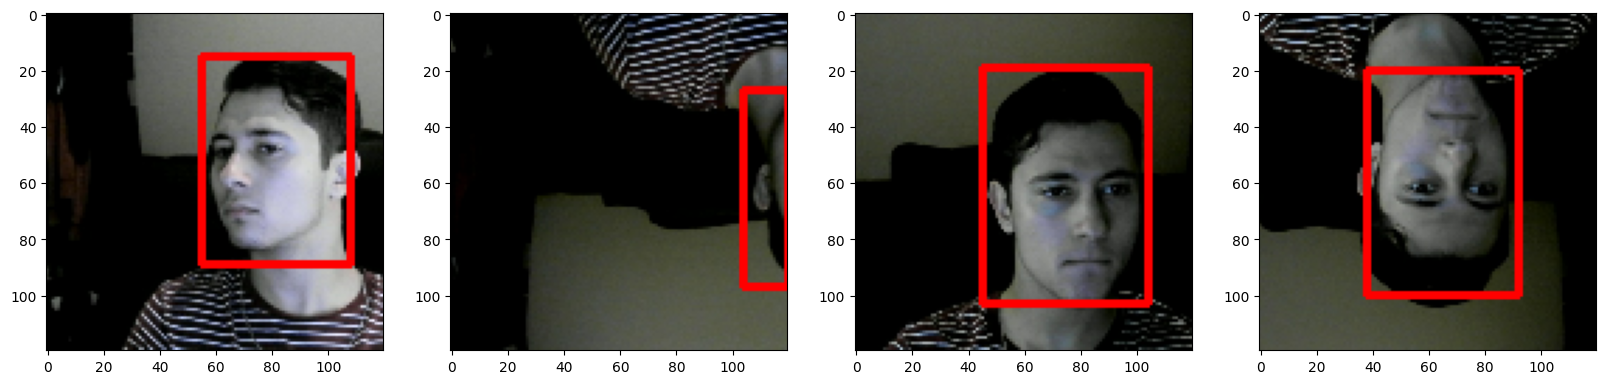

In [ ]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx in range(4):
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]

    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)),
                         (255,0,0), 2)

    ax[idx].imshow(sample_image)

# 8. Build Deep Learning model using the Functional API

### 8.1 Import Layers and Base Network

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPool2D
from tensorflow.keras.applications import VGG16

### 8.2 Download VGG16

In [ ]:
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

### 8.3 Build instance of Network

In [ ]:
def build_model():
    input_layer = Input(shape=(120,120,3))

    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model
    f1 = GlobalMaxPool2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)

    # Bounding Box Model
    f2 = GlobalMaxPool2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)

    facetracker = Model(inputs = input_layer, outputs=[class2, regress2])
    return facetracker

### 8.4 Test out Neural Network

In [ ]:
facetracker = build_model()

In [ ]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [ ]:
x, y = train.as_numpy_iterator().next()

In [ ]:
x.shape

(8, 120, 120, 3)

In [ ]:
classes, coords = facetracker.predict(x)

1/1 [==============================] - 10s 10s/step


In [ ]:
classes, coords

(array([[0.71347016],
        [0.71526927],
        [0.7043042 ],
        [0.74087673],
        [0.81836295],
        [0.7454762 ],
        [0.5917705 ],
        [0.7477716 ]], dtype=float32),
 array([[0.43409806, 0.46631065, 0.40022138, 0.6162162 ],
        [0.4094415 , 0.4151406 , 0.37903607, 0.65468264],
        [0.35440722, 0.42342353, 0.3628135 , 0.69079185],
        [0.34452546, 0.32798198, 0.41137406, 0.63862306],
        [0.4915179 , 0.3939503 , 0.34034106, 0.6752638 ],
        [0.46370664, 0.45560572, 0.47069883, 0.62121016],
        [0.48105273, 0.4673767 , 0.37596333, 0.6035853 ],
        [0.40036643, 0.33206475, 0.32678232, 0.70275044]], dtype=float32))

# 9. Define Losses and Optimizers

### 9.1 Define Optimizer and LR

In [ ]:
len(train)

848

In [ ]:
batches_per_epoch = 848
lr_decay = (1./0.75 -1)/batches_per_epoch

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

### 9.2 Create Localization Loss and Classification Loss

In [ ]:
def localization_loss(y_true, yhat):

  delta_coord = tf.reduce_sum(tf.square(y_true[:,:2]-yhat[:,:2]))

  h_true = y_true[:,3] - y_true[:,1]
  w_true = y_true[:,2] - y_true[:,0]

  h_pred = yhat[:,3] - yhat[:,1]
  w_pred = yhat[:,2] - yhat[:,0]

  delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))

  return delta_coord + delta_size

In [ ]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [ ]:
coords

array([[0.43409806, 0.46631065, 0.40022138, 0.6162162 ],
       [0.4094415 , 0.4151406 , 0.37903607, 0.65468264],
       [0.35440722, 0.42342353, 0.3628135 , 0.69079185],
       [0.34452546, 0.32798198, 0.41137406, 0.63862306],
       [0.4915179 , 0.3939503 , 0.34034106, 0.6752638 ],
       [0.46370664, 0.45560572, 0.47069883, 0.62121016],
       [0.48105273, 0.4673767 , 0.37596333, 0.6035853 ],
       [0.40036643, 0.33206475, 0.32678232, 0.70275044]], dtype=float32)

### 9.3 Test out Loss Metrics

In [ ]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=3.1050682>

In [ ]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.44311857>

In [ ]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=3.1050682>

# 10. Train Neural Network

### 10.1 Create Custom Model Class

In [ ]:
class FaceTracker(Model):
    def __init__(self, eyetracker,  **kwargs):
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt

    def train_step(self, batch, **kwargs):

        X, y = batch

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)

            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

            total_loss = batch_localizationloss+0.5*batch_classloss

            grad = tape.gradient(total_loss, self.model.trainable_variables)

        opt.apply_gradients(zip(grad, self.model.trainable_variables))

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def test_step(self, batch, **kwargs):
        X, y = batch

        classes, coords = self.model(X, training=False)

        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def call(self, X, **kwargs):
        return self.model(X, **kwargs)

In [ ]:
model = FaceTracker(facetracker)

In [ ]:
model.compile(opt, classloss, regressloss)

### 10.2 Train

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs = 40, validation_data=val,
                 callbacks=[tensorboard_callback])

Epoch 1/40
848/848 [==============================] - 82s 74ms/step - total_loss: 0.1546 - class_loss: 0.0303 - regress_loss: 0.1395 - val_total_loss: 0.0662 - val_class_loss: 1.8718e-04 - val_regress_loss: 0.0661
Epoch 2/40
848/848 [==============================] - 69s 71ms/step - total_loss: 0.0700 - class_loss: 0.0155 - regress_loss: 0.0622 - val_total_loss: 0.0626 - val_class_loss: 8.3038e-05 - val_regress_loss: 0.0625
Epoch 3/40
848/848 [==============================] - 66s 70ms/step - total_loss: 0.0710 - class_loss: 0.0187 - regress_loss: 0.0617 - val_total_loss: 0.0800 - val_class_loss: 2.1607e-06 - val_regress_loss: 0.0800
Epoch 4/40
848/848 [==============================] - 69s 70ms/step - total_loss: 0.0692 - class_loss: 0.0161 - regress_loss: 0.0612 - val_total_loss: 0.1316 - val_class_loss: 0.0525 - val_regress_loss: 0.1054
Epoch 5/40
848/848 [==============================] - 69s 71ms/step - total_loss: 0.0409 - class_loss: 0.0084 - regress_loss: 0.0367 - val_total_los

### 10.3 Plot Performance

In [ ]:
hist.history

{'total_loss': [0.010996533557772636,
  0.026212580502033234,
  0.03723423555493355,
  0.10660576820373535,
  0.011433164589107037,
  0.012933033518493176,
  0.011495592072606087,
  0.007324364967644215,
  0.0054206857457757,
  0.00833113119006157,
  0.004934273194521666,
  0.0173050407320261,
  0.011829855851829052,
  0.01456448994576931,
  0.010217812843620777,
  0.004687312059104443,
  0.004468338564038277,
  0.011794659309089184,
  0.005678321700543165,
  0.006984067149460316,
  0.005536786280572414,
  0.003194002667441964,
  0.0038165368605405092,
  0.0032943161204457283,
  0.022736869752407074,
  0.0021233572624623775,
  0.00210409052670002,
  0.0023500798270106316,
  0.003232267452403903,
  0.00261501083150506,
  0.0021003601141273975,
  0.0023966243024915457,
  0.0020700222812592983,
  0.002286025555804372,
  0.0009335471550002694,
  0.0024023493751883507,
  0.0014337425818666816,
  0.0033832283224910498,
  0.002334916265681386,
  0.002096099779009819],
 'class_loss': [0.000114

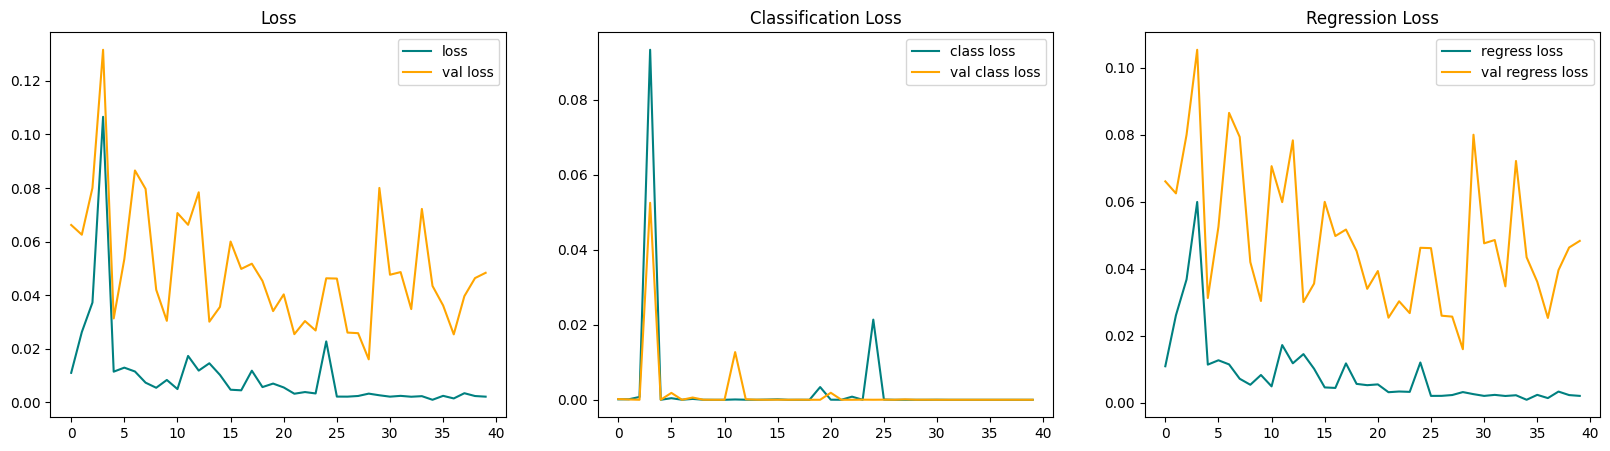

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# 11. Make Predictions

11.1 Make Predictions on Test Set

In [ ]:
test_data = test.as_numpy_iterator()

In [ ]:
test_sample = test_data.next()

In [ ]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 69ms/step


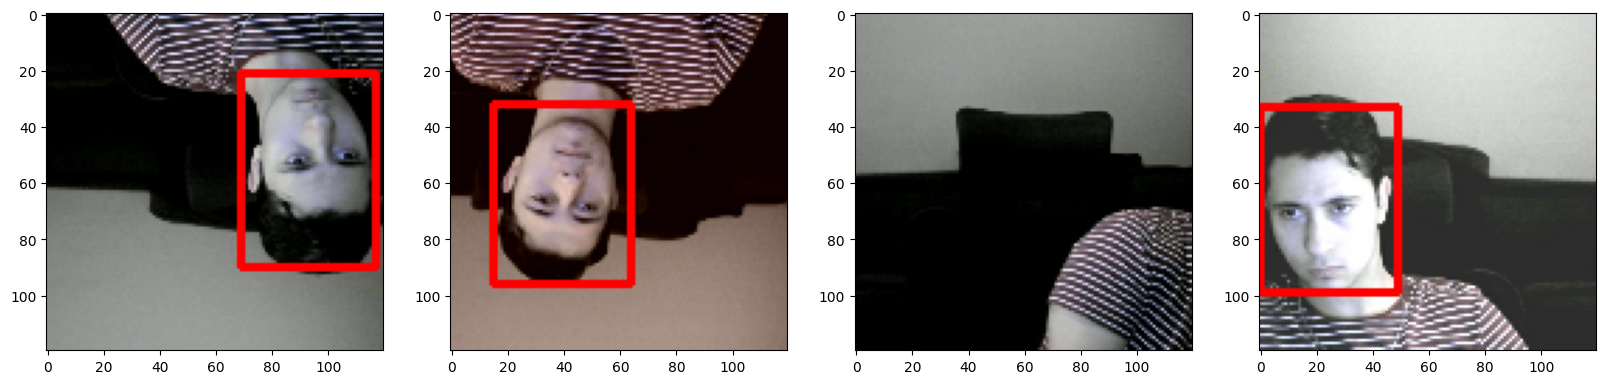

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]

    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image,
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                            (255,0,0), 2)

    ax[idx].imshow(sample_image)

### 11.2 Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
facetracker.save('facetracker.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
facetracker = load_model('facetracker.h5')

### 11.3 Real Time Detection

In [ ]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))

    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]

    if yhat[0] > 0.5:
        # Controls the main rectangle
        cv2.rectangle(frame,
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)),
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame,
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])),
                            (255,0,0), -1)

        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

    cv2.imshow('EyeTrack', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()